In [280]:
import os
import pandas as pd
import geopandas as gp
import seaborn as sns
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import unicodedata


Se carga el archivo 'Buscador_Instituciones_2022'

In [281]:
ruta_instituciones = os.path.join('Buscador_Instituciones_2022_.xlsx')
instituciones= pd.read_excel(ruta_instituciones)
#https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row
header_inst = instituciones.iloc[1] 
instituciones = instituciones[2:] 
instituciones.columns = header_inst
instituciones['Tipo de institución'] = instituciones['Tipo de institución'].dropna()
instituciones = instituciones.dropna(subset=['ID'])
instituciones['Municipal y Servicios locales'] = instituciones['Municipal y Servicios locales'].astype(np.float64)
instituciones['Subvencionado'] = instituciones['Subvencionado'].astype(np.float64)
instituciones['Particular Pagado'] = instituciones['Particular Pagado'].astype(np.float64)
instituciones['Administración Delegada'] = instituciones['Administración Delegada'].astype(np.float64)
instituciones['Municipal y Servicios locales'] = instituciones['Municipal y Servicios locales'] * 100
instituciones['Subvencionado'] = instituciones['Subvencionado'] * 100
instituciones['Particular Pagado'] = instituciones['Particular Pagado'] * 100
instituciones['Administración Delegada'] = instituciones['Administración Delegada'] * 100
instituciones


1,ID,Tipo de institución,Nombre institución,Situación de autonomía,Dirección,Página web,Acreditación,Años acreditación (31-12-2021),Período de acreditación (31-12-2021),Áreas obligatorias de acreditación,...,m² construidos ponderados,N° de volúmenes de biblioteca,N° de laboratorios y talleres,m² construidos laboratorios y talleres,N° de computadores,m² construidos por estudiante (jornada principal),Volúmenes por estudiante,Computadores por estudiante,m² construidos biblioteca,m² áreas verdes y esparcimiento
2,1,Universidades Privadas,Universidad Gabriela Mistral,Autónoma,"Avda. Ricardo Lyon Nº 1177 - Providencia, Sant...",www.ugm.cl,Acreditada,3,Desde 15 de diciembre de 2021 hasta 15 de dici...,Gestión Institucional y Docencia de Pregrado,...,11222.3,72121,33,1188.4,138,15.373014,75.20438,0.1439,1348,3537
3,2,Universidades Privadas,Universidad Finis Terrae,Autónoma,"Avda. Pedro de Valdivia Nº 1509 - Providencia,...",www.finisterrae.cl,Acreditada,4,Desde 19 de noviembre de 2019 hasta 19 de novi...,Gestión Institucional y Docencia de Pregrado,...,42657,70822,169,8609,627,5.443027,7.736727,0.068495,1653,7272
4,3,Universidades Privadas Cruch,Universidad Diego Portales,Autónoma,"Av. Manuel Rodríguez Sur Nº 415, Santiago",www.udp.cl,Acreditada,5,Desde 24 de octubre de 2018 hasta 24 de octubr...,Gestión Institucional y Docencia de Pregrado,...,133868.3,293807,115,7633.6,2756,8.748419,16.667064,0.156342,17794,27736
5,4,Universidades Privadas,Universidad Central de Chile,Autónoma,"Toesca Nº 1783, Santiago",www.ucentral.cl,Acreditación extendida,4,Desde 21 de diciembre de 2017 hasta 21 de dici...,Gestión Institucional y Docencia de Pregrado,...,89749.1,118169,91,6982.7,1060,9.061904,8.961702,0.080388,3162.7,21927.1
6,7,Universidades Privadas,Universidad Bolivariana,Autónoma,"Huérfanos Nº 1721 , Santiago",www.ubolivariana.cl,No Acreditada,NaN,NaN,NaN,...,11482.95,45901,32,1467,256,7.886544,14.457008,0.08063,668,6076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,914,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región del M...,Autónoma,"Maria Auxiliadora Nº 380, Linares",www.cftmaule.cl,No Acreditada,NaN,NaN,NaN,...,1673,722,3,371,111,5.576667,1.372624,0.211027,42,0
133,916,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región de La...,Autónoma,"Manuel Matta Nº 1055, Lautaro",www.cftaraucania.cl,No Acreditada,NaN,NaN,NaN,...,2054,0,5,357.9,96,11.60452,NaN,0.341637,0,4628
134,917,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región de Lo...,Autónoma,"Calle Comercio Nº 230, La Unión",www.cftdelosrios.cl,No Acreditada,NaN,NaN,NaN,...,1025.6,0,3,156,87,5.513978,NaN,0.329545,0,1141.5
135,918,Centros de Formación Técnica Estatales,Centro de Formación Técnica de la Región de Lo...,Autónoma,"Vicente Pérez Rosales Nº 529, Llanquihue",www.aprendizajeeslibertad.cl/,No Acreditada,NaN,NaN,NaN,...,80,0,0,0,54,0.597015,NaN,0.402985,0,0


Se agrupa por tipo de institución, buscando el porcentaje que poseen de alumnos provenientes de colegios Municipales y Servicios Locales, Subvencionados, Particulares Pagados, y Administración Delegada.

In [282]:
tipo_institucion = instituciones.groupby('Tipo de institución').mean()
tipo_institucion

1,Municipal y Servicios locales,Subvencionado,Particular Pagado,Administración Delegada
Tipo de institución,,,,
Centros de Formación Técnica,42.430258,46.063856,8.020365,3.485521
Centros de Formación Técnica Estatales,60.956618,35.889489,0.864487,2.289406
Institutos Profesionales,33.962477,50.142350,10.650177,5.244996
Universidades Estatales Cruch,33.902602,56.548436,7.446698,2.102265
Universidades Privadas,25.417204,56.037622,15.096309,3.448865
Universidades Privadas Cruch,25.379634,49.927391,22.706269,1.986705


Se observa que en las universidades, predominan la cantidad de alumnos de colegios subvencionados, excepto en los CFT estatales, en donde predominan alumnos de colegio Municipales. Se observa que en las universidades privadas CRUCH es donde hay más alumnos de colegios particulares pagados en comparación a otras instituciones.

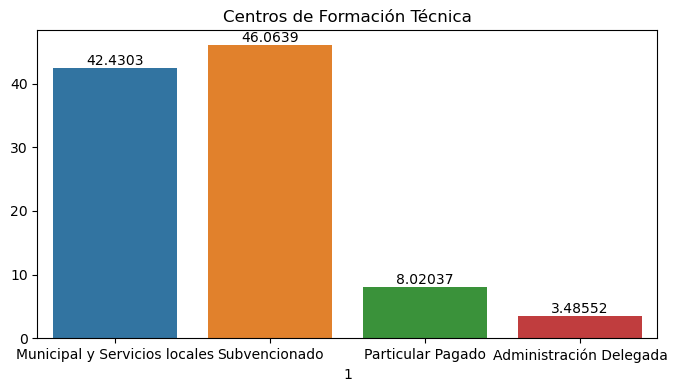

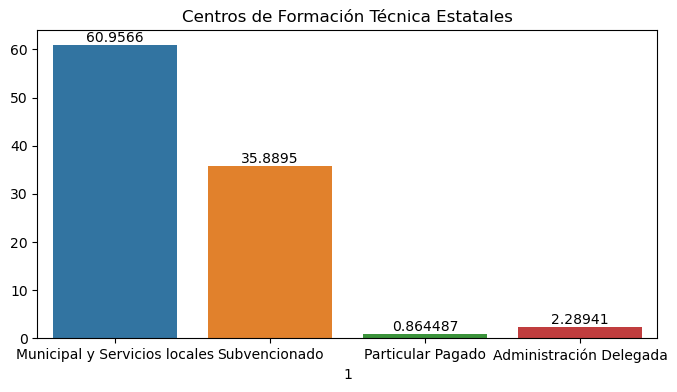

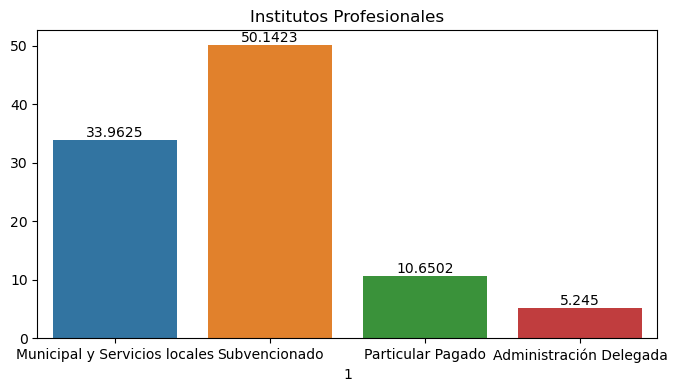

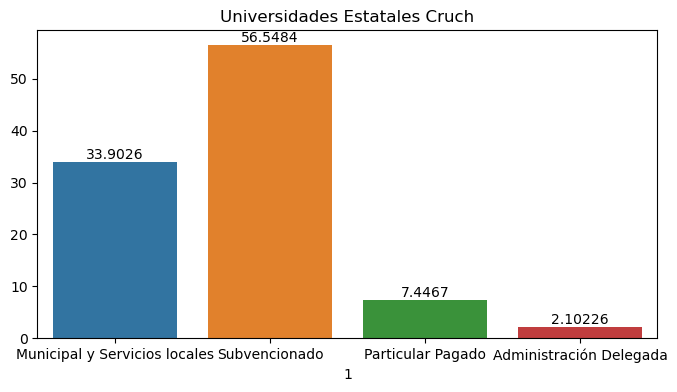

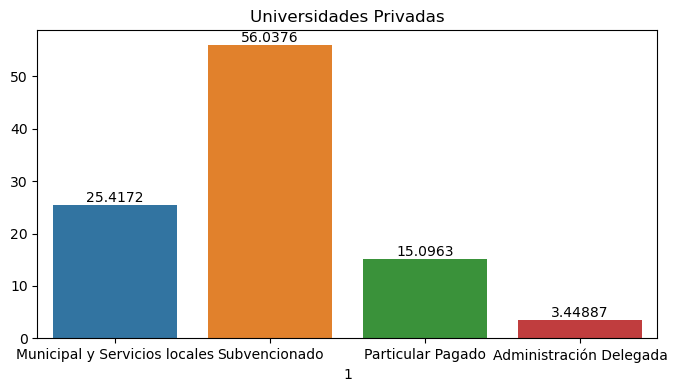

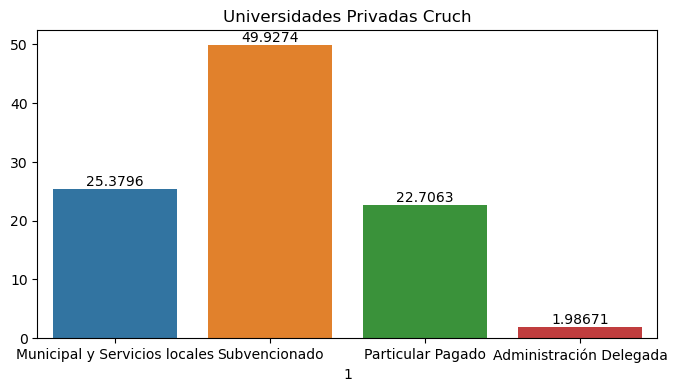

In [283]:
for indice in range(len(tipo_institucion.index)):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.barplot(data = tipo_institucion.iloc[[indice]], ci = None, ax = ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(tipo_institucion.index[indice])

Buscaremos la distribución de cada alumno proveniente de ada tipo de colegio, pero esta vez en relación a universidades con 7 años de acreditación (acreditación máxima, explicar lo que es la cna)

In [284]:
universidades_7 = instituciones[instituciones['Años acreditación (31-12-2021)'] == 7]
universidades_7 = universidades_7[universidades_7['Tipo de institución'].str.contains('Universidades') == True]
universidades_7 = universidades_7.groupby('Nombre institución').mean()
lista_universidades_7 = []
for universidad in universidades_7.index:
    universidad = unicodedata.normalize('NFD', universidad).encode('ascii', 'ignore').decode('utf-8')
    lista_universidades_7.append(universidad.upper())
universidades_7
 

['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD DE SANTIAGO DE CHILE']


1,Municipal y Servicios locales,Subvencionado,Particular Pagado,Administración Delegada
Nombre institución,,,,
Pontificia Universidad Católica de Chile,11.203306,27.277756,61.050371,0.468567
Universidad de Chile,27.139595,39.928633,32.143877,0.787896
Universidad de Concepción,28.756605,57.304140,11.715513,2.223743
Universidad de Santiago de Chile,26.260054,60.317248,9.754245,3.668454


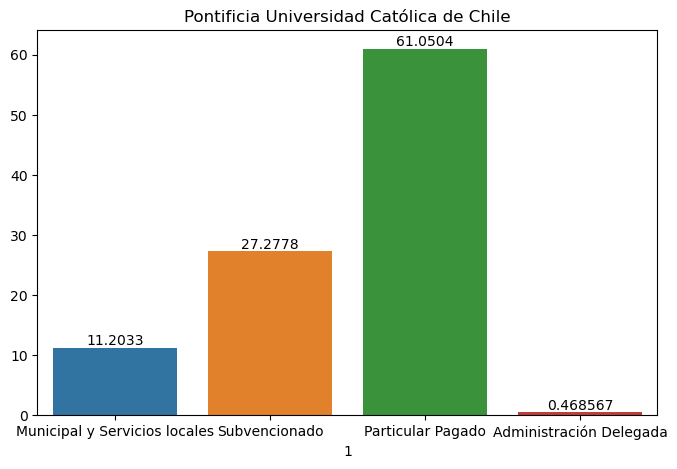

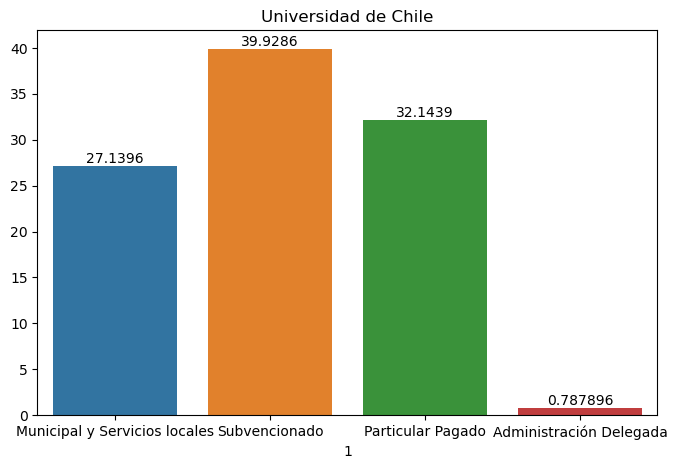

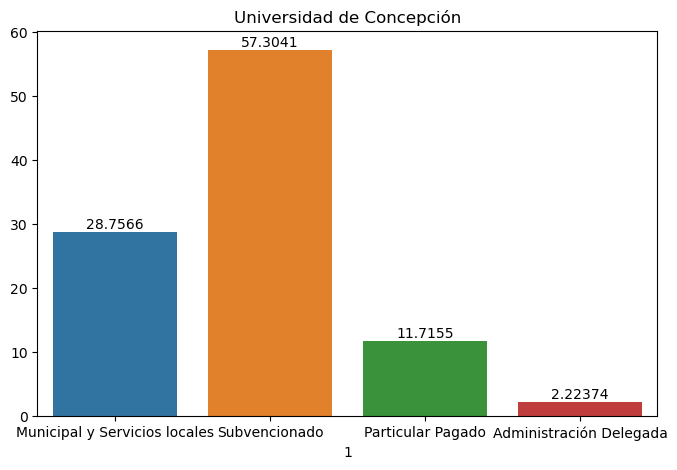

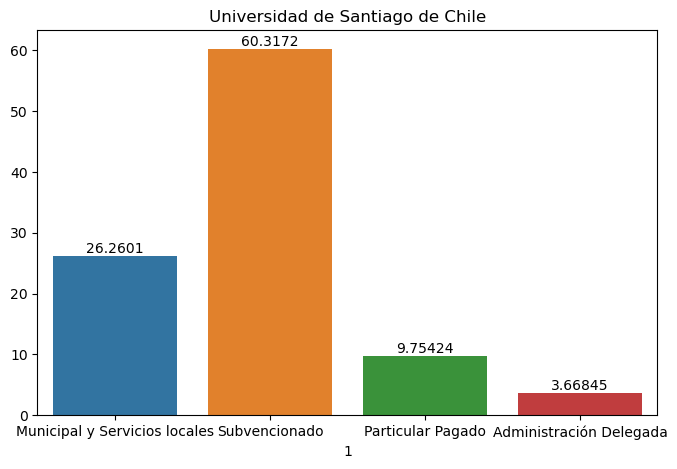

In [285]:
for indice in range(len(universidades_7.index)):
    fig, ax = plt.subplots(figsize = (8, 5))
    sns.barplot(data = universidades_7.iloc[[indice]], ci = None, ax = ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(universidades_7.index[indice])

Análisis de comunas de alumnos que entraron a cada universidad con 7 años de acreditación. (Ingreso 2022)

In [286]:
ruta_comunas = os.path.join('mapa_comunas', 'COMUNA', 'COMUNAS_2020.SHP')
comunas = gp.read_file(ruta_comunas)
comunas['COMUNA'] = comunas['COMUNA'].astype('object')
#https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas
comunas['COMUNA'] = comunas['COMUNA'].str.upper()
comunas = comunas.set_index('COMUNA')
comunas

,CUT_REG,CUT_PROV,CUT_COM,REGION,PROVINCIA,SUPERFICIE,geometry
COMUNA,,,,,,,
IQUIQUE,01,011,01101,Tarapacá,Iquique,2289.53,"MULTIPOLYGON (((-70.11528 -21.17792, -70.11540..."
ALTO HOSPICIO,01,011,01107,Tarapacá,Iquique,571.19,"POLYGON ((-69.92603 -20.25000, -69.96762 -20.3..."
POZO ALMONTE,01,014,01401,Tarapacá,Tamarugal,13765.80,"POLYGON ((-68.99185 -19.92108, -68.98991 -19.9..."
CAMIÑA,01,014,01402,Tarapacá,Tamarugal,2199.83,"POLYGON ((-69.39521 -19.06188, -69.39385 -19.0..."
COLCHANE,01,014,01403,Tarapacá,Tamarugal,4007.84,"POLYGON ((-68.65146 -19.77181, -68.65148 -19.7..."
...,...,...,...,...,...,...,...
HUALPÉN,08,081,08112,Biobío,Concepción,53.77,"MULTIPOLYGON (((-73.17486 -36.81466, -73.17491..."
SAN PEDRO DE LA PAZ,08,081,08108,Biobío,Concepción,112.86,"POLYGON ((-73.09146 -36.82367, -73.08958 -36.8..."
HUALQUI,08,081,08105,Biobío,Concepción,535.85,"POLYGON ((-72.92506 -36.89303, -72.92471 -36.8..."


In [287]:
ruta_rendimiento_2021 = os.path.join('ingreso_ed_superior', 'rendimiento_2021.csv')
ruta_superior_2022 = os.path.join('ingreso_ed_superior', 'superior_2022.csv')
rendimiento_2021 = pd.read_csv(ruta_rendimiento_2021, delimiter= ';')
superior_2022 = pd.read_csv(ruta_superior_2022, delimiter= ';')

C:\Users\danie\AppData\Local\Temp\ipykernel_19960\1227584972.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  rendimiento_2021 = pd.read_csv(ruta_rendimiento_2021, delimiter= ';')
C:\Users\danie\AppData\Local\Temp\ipykernel_19960\1227584972.py:4: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  superior_2022 = pd.read_csv(ruta_superior_2022, delimiter= ';')


In [288]:
rendimiento_2021 = rendimiento_2021.dropna(subset = ['MRUN'])
rendimiento_2021['EDAD_ALU'] = rendimiento_2021['EDAD_ALU'].replace(' ', np.nan)
rendimiento_2021 = rendimiento_2021.dropna(subset = ['EDAD_ALU'])
rendimiento_2021['EDAD_ALU'] = rendimiento_2021['EDAD_ALU'].astype(np.int64)
rendimiento_2021['EDAD_ALU'] = rendimiento_2021['EDAD_ALU'].astype(np.int64)
rendimiento_2021 = rendimiento_2021[rendimiento_2021['EDAD_ALU'] <= 17]
rendimiento_2021 = rendimiento_2021[['MRUN', 'AGNO', 'COD_REG_RBD', 'COD_PRO_RBD', 'NOM_COM_RBD']]


In [289]:
rendimiento_2021

,MRUN,AGNO,COD_REG_RBD,COD_PRO_RBD,NOM_COM_RBD
12,761596,2021,15,151,ARICA
13,861896,2021,15,151,ARICA
14,1827644,2021,15,151,ARICA
15,2370806,2021,15,151,ARICA
16,4170305,2021,15,151,ARICA
...,...,...,...,...,...
3237038,19559102,2021,8,83,LOS ÁNGELES
3237039,10334694,2021,8,83,LOS ÁNGELES
3237040,13127779,2021,8,83,LOS ÁNGELES
3237041,4362526,2021,8,83,LOS ÁNGELES


In [290]:
superior_2022 = superior_2022.rename(columns={'mrun' : 'MRUN'})
superior_2022 = superior_2022.dropna(subset = ['MRUN'])
superior_2022 = superior_2022[['MRUN', 'codigo_unico',  'cod_inst', 'nomb_inst', 'cod_carrera', 'nomb_carrera', 'region_sede', 'provincia_sede', 'comuna_sede', 'valor_matricula', 'valor_arancel', 'codigo_demre', 'acre_inst_anio']]

In [291]:
superior_2022

,MRUN,codigo_unico,cod_inst,nomb_inst,cod_carrera,nomb_carrera,region_sede,provincia_sede,comuna_sede,valor_matricula,valor_arancel,codigo_demre,acre_inst_anio
0,26.0,I45S2C4J1V1,45,UNIVERSIDAD DEL DESARROLLO,4,DERECHO,Metropolitana,SANTIAGO,LAS CONDES,25.0,232.0,44006,6.0
1,35.0,I31S2C41J1V1,31,UNIVERSIDAD AUTONOMA DE CHILE,41,ENFERMERIA,Maule,TALCA,TALCA,255000.0,3924000.0,49201,5.0
2,43.0,I70S1C900J1V1,70,UNIVERSIDAD DE CHILE,900,"DOCTORADO EN TERRITORIO, ESPACIO Y SOCIEDAD",Metropolitana,SANTIAGO,SANTIAGO,157900.0,3668000.0,0,7.0
3,51.0,I143S27C34J2V1,143,IP AIEP,34,TECNICO EN ENFERMERIA,Metropolitana,SANTIAGO,CONCHALI,200000.0,2470000.0,0,5.0
4,98.0,I111S22C8J1V1,111,IP DUOC UC,8,GASTRONOMIA,Metropolitana,SANTIAGO,SANTIAGO,204000.0,2650000.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300607,27082979.0,I80S1C342J2V1,80,UNIVERSIDAD DE TARAPACA,342,INGENIERIA EN ADMINISTRACION DE EMPRESAS,Arica y Parinacota,ARICA,ARICA,165000.0,3576000.0,0,5.0
1300608,27082980.0,I23S2C21J5V1,23,UNIVERSIDAD ADOLFO IBAÑEZ,21,MAGISTER EN ADMINISTRACION DE EMPRESAS (EXECUT...,Metropolitana,SANTIAGO,PEÑALOLEN,70.0,533.0,0,6.0
1300609,27082981.0,I2S1C397J2V1,2,UNIVERSIDAD FINIS TERRAE,397,DIPLOMADO EN NUTRICION CLINICA DEL ADULTO Y AD...,Metropolitana,SANTIAGO,PROVIDENCIA,80000.0,950000.0,0,4.0
1300610,27082982.0,I90S1C592J1V1,90,UNIVERSIDAD AUSTRAL DE CHILE,592,DIPLOMADO EN FOMENTO LECTOR Y LITERATURA PARA ...,Los Ríos,VALDIVIA,VALDIVIA,190000.0,1010000.0,0,6.0


In [292]:
ingreso = rendimiento_2021.merge(superior_2022, on = 'MRUN')
ingreso = ingreso.rename(columns = {'NOM_COM_RBD' : 'COMUNA'})
ingreso

,MRUN,AGNO,COD_REG_RBD,COD_PRO_RBD,COMUNA,codigo_unico,cod_inst,nomb_inst,cod_carrera,nomb_carrera,region_sede,provincia_sede,comuna_sede,valor_matricula,valor_arancel,codigo_demre,acre_inst_anio
0,11469791,2021,15,151,ARICA,I80S1C72J1V3,80,UNIVERSIDAD DE TARAPACA,72,INGENIERIA CIVIL MECANICA,Arica y Parinacota,ARICA,ARICA,165000.0,4096000.0,22076,5.0
1,12008281,2021,15,151,ARICA,I80S1C72J1V3,80,UNIVERSIDAD DE TARAPACA,72,INGENIERIA CIVIL MECANICA,Arica y Parinacota,ARICA,ARICA,165000.0,4096000.0,22076,5.0
2,4854783,2021,15,151,ARICA,I430S2C326J1V1,430,CFT INACAP,326,TECNICO EN MECANICA Y ELECTROMOVILIDAD AUTOMOTRIZ,Arica y Parinacota,ARICA,ARICA,230000.0,2146000.0,0,7.0
3,9318877,2021,15,151,ARICA,I430S2C326J1V1,430,CFT INACAP,326,TECNICO EN MECANICA Y ELECTROMOVILIDAD AUTOMOTRIZ,Arica y Parinacota,ARICA,ARICA,230000.0,2146000.0,0,7.0
4,13322058,2021,15,151,ARICA,I430S2C326J2V1,430,CFT INACAP,326,TECNICO EN MECANICA Y ELECTROMOVILIDAD AUTOMOTRIZ,Arica y Parinacota,ARICA,ARICA,230000.0,2146000.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77439,11446443,2021,3,31,COPIAPÓ,I91S2C30J1V2,91,UNIVERSIDAD CATOLICA DEL NORTE,30,INGENIERIA CIVIL INDUSTRIAL,Coquimbo,ELQUI,COQUIMBO,150800.0,4545360.0,18093,6.0
77440,12907287,2021,3,31,COPIAPÓ,I79S1C56J1V1,79,UNIVERSIDAD DE ATACAMA,56,ENFERMERIA Y LICENCIATURA EN ENFERMERIA,Atacama,COPIAPO,COPIAPO,139000.0,2986000.0,27080,4.0
77441,13224855,2021,3,31,COPIAPÓ,I79S1C5J1V1,79,UNIVERSIDAD DE ATACAMA,5,INGENIERIA CIVIL EN MINAS,Atacama,COPIAPO,COPIAPO,139000.0,3044000.0,27001,4.0
77442,18233147,2021,3,31,COPIAPÓ,I79S1C2J1V2,79,UNIVERSIDAD DE ATACAMA,2,DERECHO,Atacama,COPIAPO,COPIAPO,139000.0,3333000.0,27040,4.0


In [298]:
for universidad in lista_universidades_7:
    ub_colegios_universidad = ingreso[ingreso['nomb_inst'] == universidad]
    alu_por_comuna = ub_colegios_universidad.groupby('COMUNA').count()
    comunas[universidad] = alu_por_comuna['MRUN']
comunas = comunas.replace(np.nan, float(0))
comunas



,CUT_REG,CUT_PROV,CUT_COM,REGION,PROVINCIA,SUPERFICIE,geometry,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD DE CHILE,UNIVERSIDAD DE CONCEPCION,UNIVERSIDAD DE SANTIAGO DE CHILE
COMUNA,,,,,,,,,,,
IQUIQUE,01,011,01101,Tarapacá,Iquique,2289.53,"MULTIPOLYGON (((-70.11528 -21.17792, -70.11540...",29.0,30.0,14.0,5.0
ALTO HOSPICIO,01,011,01107,Tarapacá,Iquique,571.19,"POLYGON ((-69.92603 -20.25000, -69.96762 -20.3...",2.0,6.0,9.0,4.0
POZO ALMONTE,01,014,01401,Tarapacá,Tamarugal,13765.80,"POLYGON ((-68.99185 -19.92108, -68.98991 -19.9...",0.0,0.0,0.0,0.0
CAMIÑA,01,014,01402,Tarapacá,Tamarugal,2199.83,"POLYGON ((-69.39521 -19.06188, -69.39385 -19.0...",0.0,0.0,0.0,0.0
COLCHANE,01,014,01403,Tarapacá,Tamarugal,4007.84,"POLYGON ((-68.65146 -19.77181, -68.65148 -19.7...",0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
HUALPÉN,08,081,08112,Biobío,Concepción,53.77,"MULTIPOLYGON (((-73.17486 -36.81466, -73.17491...",5.0,1.0,40.0,1.0
SAN PEDRO DE LA PAZ,08,081,08108,Biobío,Concepción,112.86,"POLYGON ((-73.09146 -36.82367, -73.08958 -36.8...",15.0,5.0,163.0,0.0
HUALQUI,08,081,08105,Biobío,Concepción,535.85,"POLYGON ((-72.92506 -36.89303, -72.92471 -36.8...",0.0,0.0,3.0,0.0


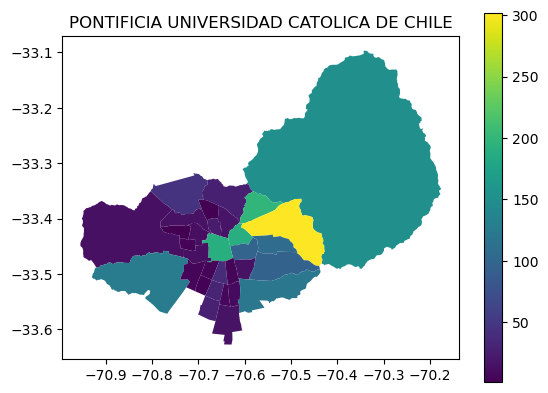

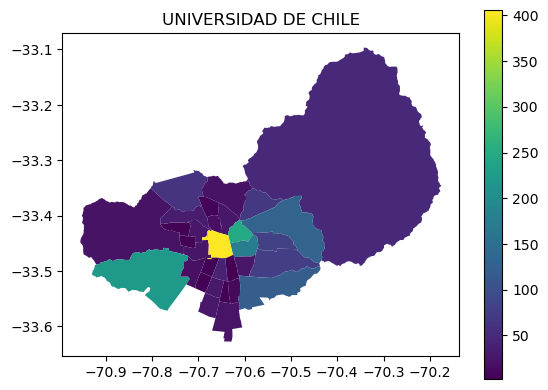

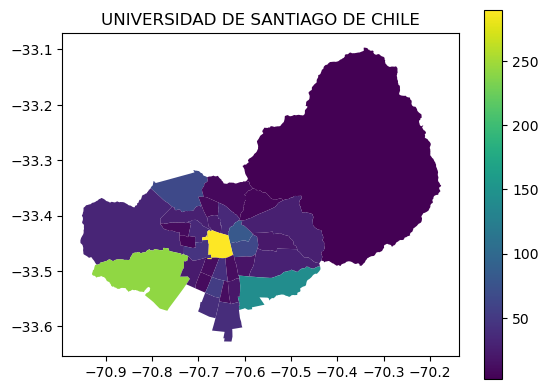

In [337]:
for universidad in lista_universidades_7:
    if universidad != 'UNIVERSIDAD DE CONCEPCION':
        fig, ax = plt.subplots()
        prov_stgo = comunas[comunas['PROVINCIA'] == 'Santiago']
        prov_stgo.plot(column = universidad, legend = True, ax = ax)
        bounds = prov_stgo.geometry.total_bounds
        xlim = ([bounds[0],  bounds[2]])
        ylim = ([bounds[1],  bounds[3]])
        plt.title(universidad)

In [322]:
ruta_ub_colegios = os.path.join('directorio_colegios_y_documentacion', '20220914_Directorio_Oficial_EE_2022_20220430_WEB.csv')
ub_colegios = pd.read_csv(ruta_ub_colegios, sep = ';', decimal = ',')

ub_colegios = ub_colegios[ub_colegios['LONGITUD'] != ' ']
ub_colegios = ub_colegios[ub_colegios['LATITUD'] != ' ']
ub_colegios['LONGITUD'] = ub_colegios['LONGITUD'].str.replace(',', '.')
ub_colegios['LATITUD'] = ub_colegios['LATITUD'].str.replace(',', '.')
ub_colegios = ub_colegios[ub_colegios['PAGO_MENSUAL'] != 'SIN INFORMACION']
ub_colegios['LONGITUD'] = ub_colegios['LONGITUD'].astype(np.float64)
ub_colegios['LATITUD'] = ub_colegios['LATITUD'].astype(np.float64)
ub_colegios['MAT_TOTAL'] = ub_colegios['MAT_TOTAL'].astype(np.float64)
ub_colegios['MATRICULA'] = ub_colegios['MATRICULA'].astype(np.float64)
ub_colegios = ub_colegios.dropna()
ub_colegios = ub_colegios.rename(columns = {'NOM_COM_RBD':'COMUNA'})
ub_colegios = gp.GeoDataFrame(ub_colegios, geometry=gp.points_from_xy(ub_colegios['LONGITUD'], ub_colegios['LATITUD']))
ub_colegios

c:\Users\danie\anaconda3\envs\datascience\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_10,ENS_11,MAT_TOTAL,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,geometry
0,2022,1,9,LICEO POLITECNICO ARICA,,62000660,1,15,AYP,151,...,0,0,667.0,1.0,1,2,,GRATUITO,GRATUITO,POINT (-70.29521 -18.48720)
1,2022,2,7,PARVULARIO LAS ESPIGUITAS,,62000660,1,15,AYP,151,...,0,0,166.0,1.0,1,2,,GRATUITO,GRATUITO,POINT (-70.30276 -18.46986)
2,2022,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,62000660,1,15,AYP,151,...,0,0,376.0,1.0,1,1,,GRATUITO,GRATUITO,POINT (-70.26083 -18.50358)
3,2022,4,3,LICEO OCTAVIO PALMA PEREZ,,62000660,1,15,AYP,151,...,0,0,1014.0,1.0,1,1,,GRATUITO,GRATUITO,POINT (-70.30827 -18.47424)
4,2022,5,1,JOVINA NARANJO FERNANDEZ,,62000660,1,15,AYP,151,...,0,0,771.0,1.0,1,7,PLURALISTA,GRATUITO,GRATUITO,POINT (-70.31345 -18.47690)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16556,2022,42032,8,COLEGIO HUELLAS,,77257123,1,16,NUBLE,161,...,0,0,60.0,1.0,1,1,,MAS DE $100.000,MAS DE $100.000,POINT (-72.04645 -36.56393)
16566,2022,42042,5,ESCUELA HOSPITALARIA PUTAENDO,,65193679,1,5,VALPO,57,...,0,0,6.0,1.0,1,1,,GRATUITO,GRATUITO,POINT (-70.68808 -32.61895)
16569,2022,42048,4,ESCUELA ESPECIAL DE LENGUAJE GRANJERITOS,,65119714,1,7,MAULE,71,...,0,0,0.0,0.0,4,1,,GRATUITO,GRATUITO,POINT (-71.15360 -35.15130)
16577,2022,42064,6,JARDIN INFANTIL ARCOIRIS FLORENCIA,,77112362,1,5,VALPO,56,...,0,0,0.0,0.0,1,1,,MAS DE $100.000,MAS DE $100.000,POINT (-71.61107 -33.61766)


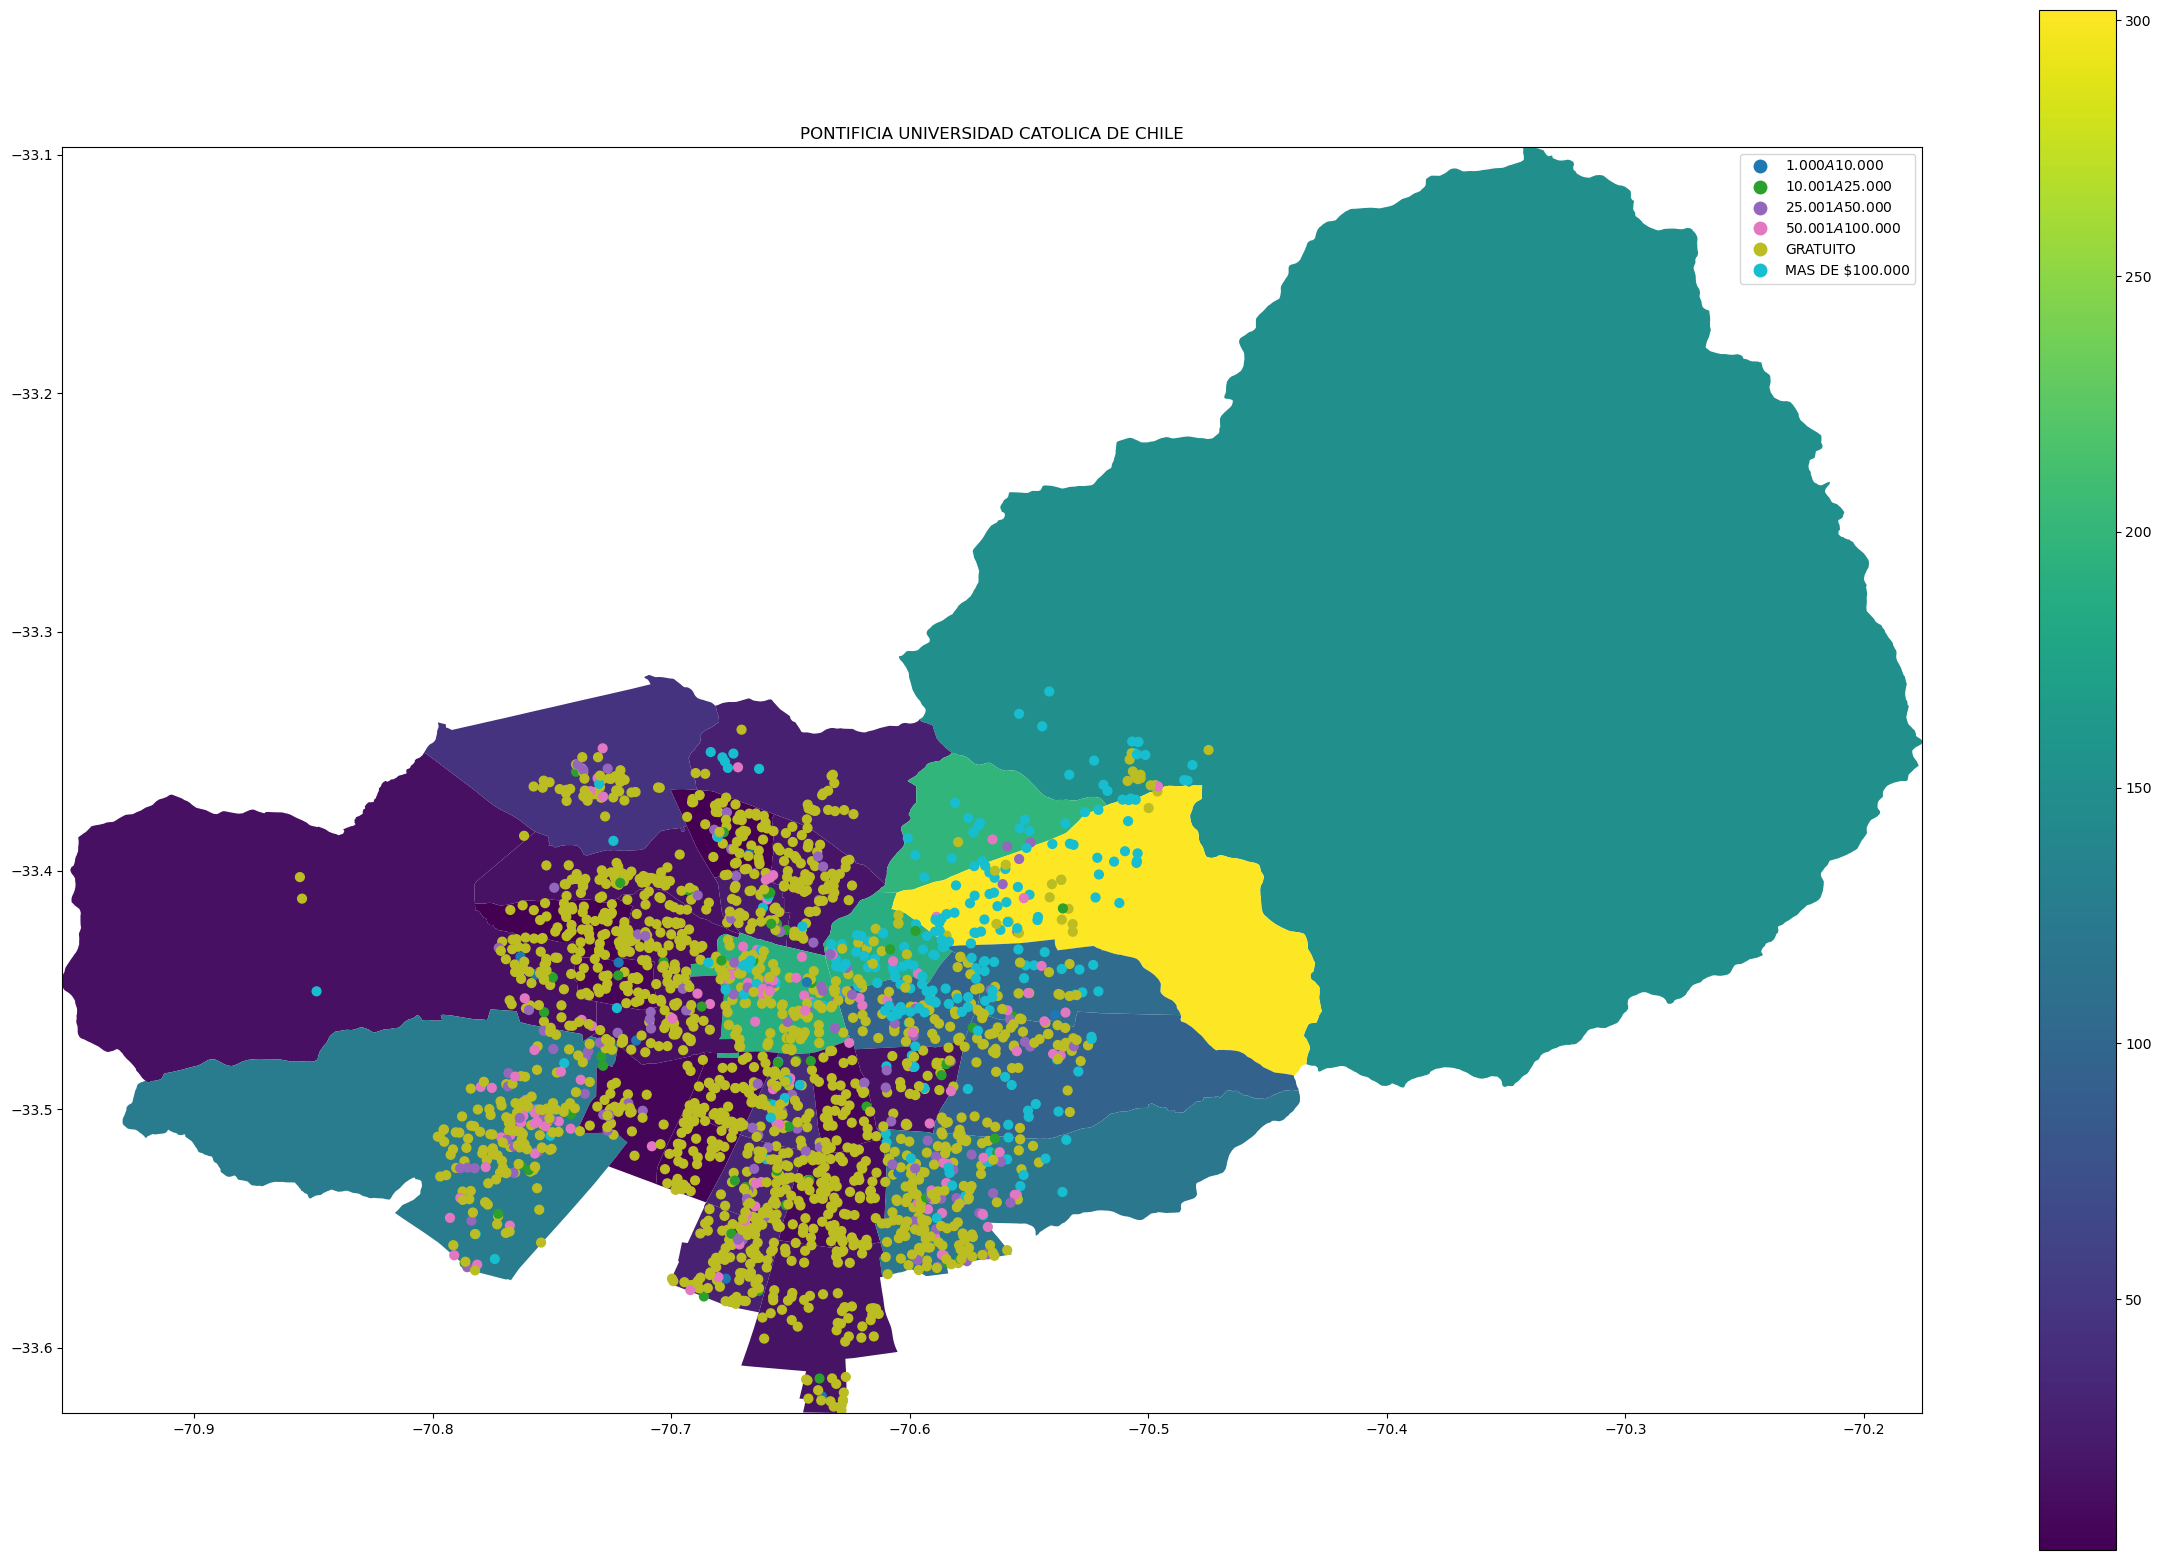

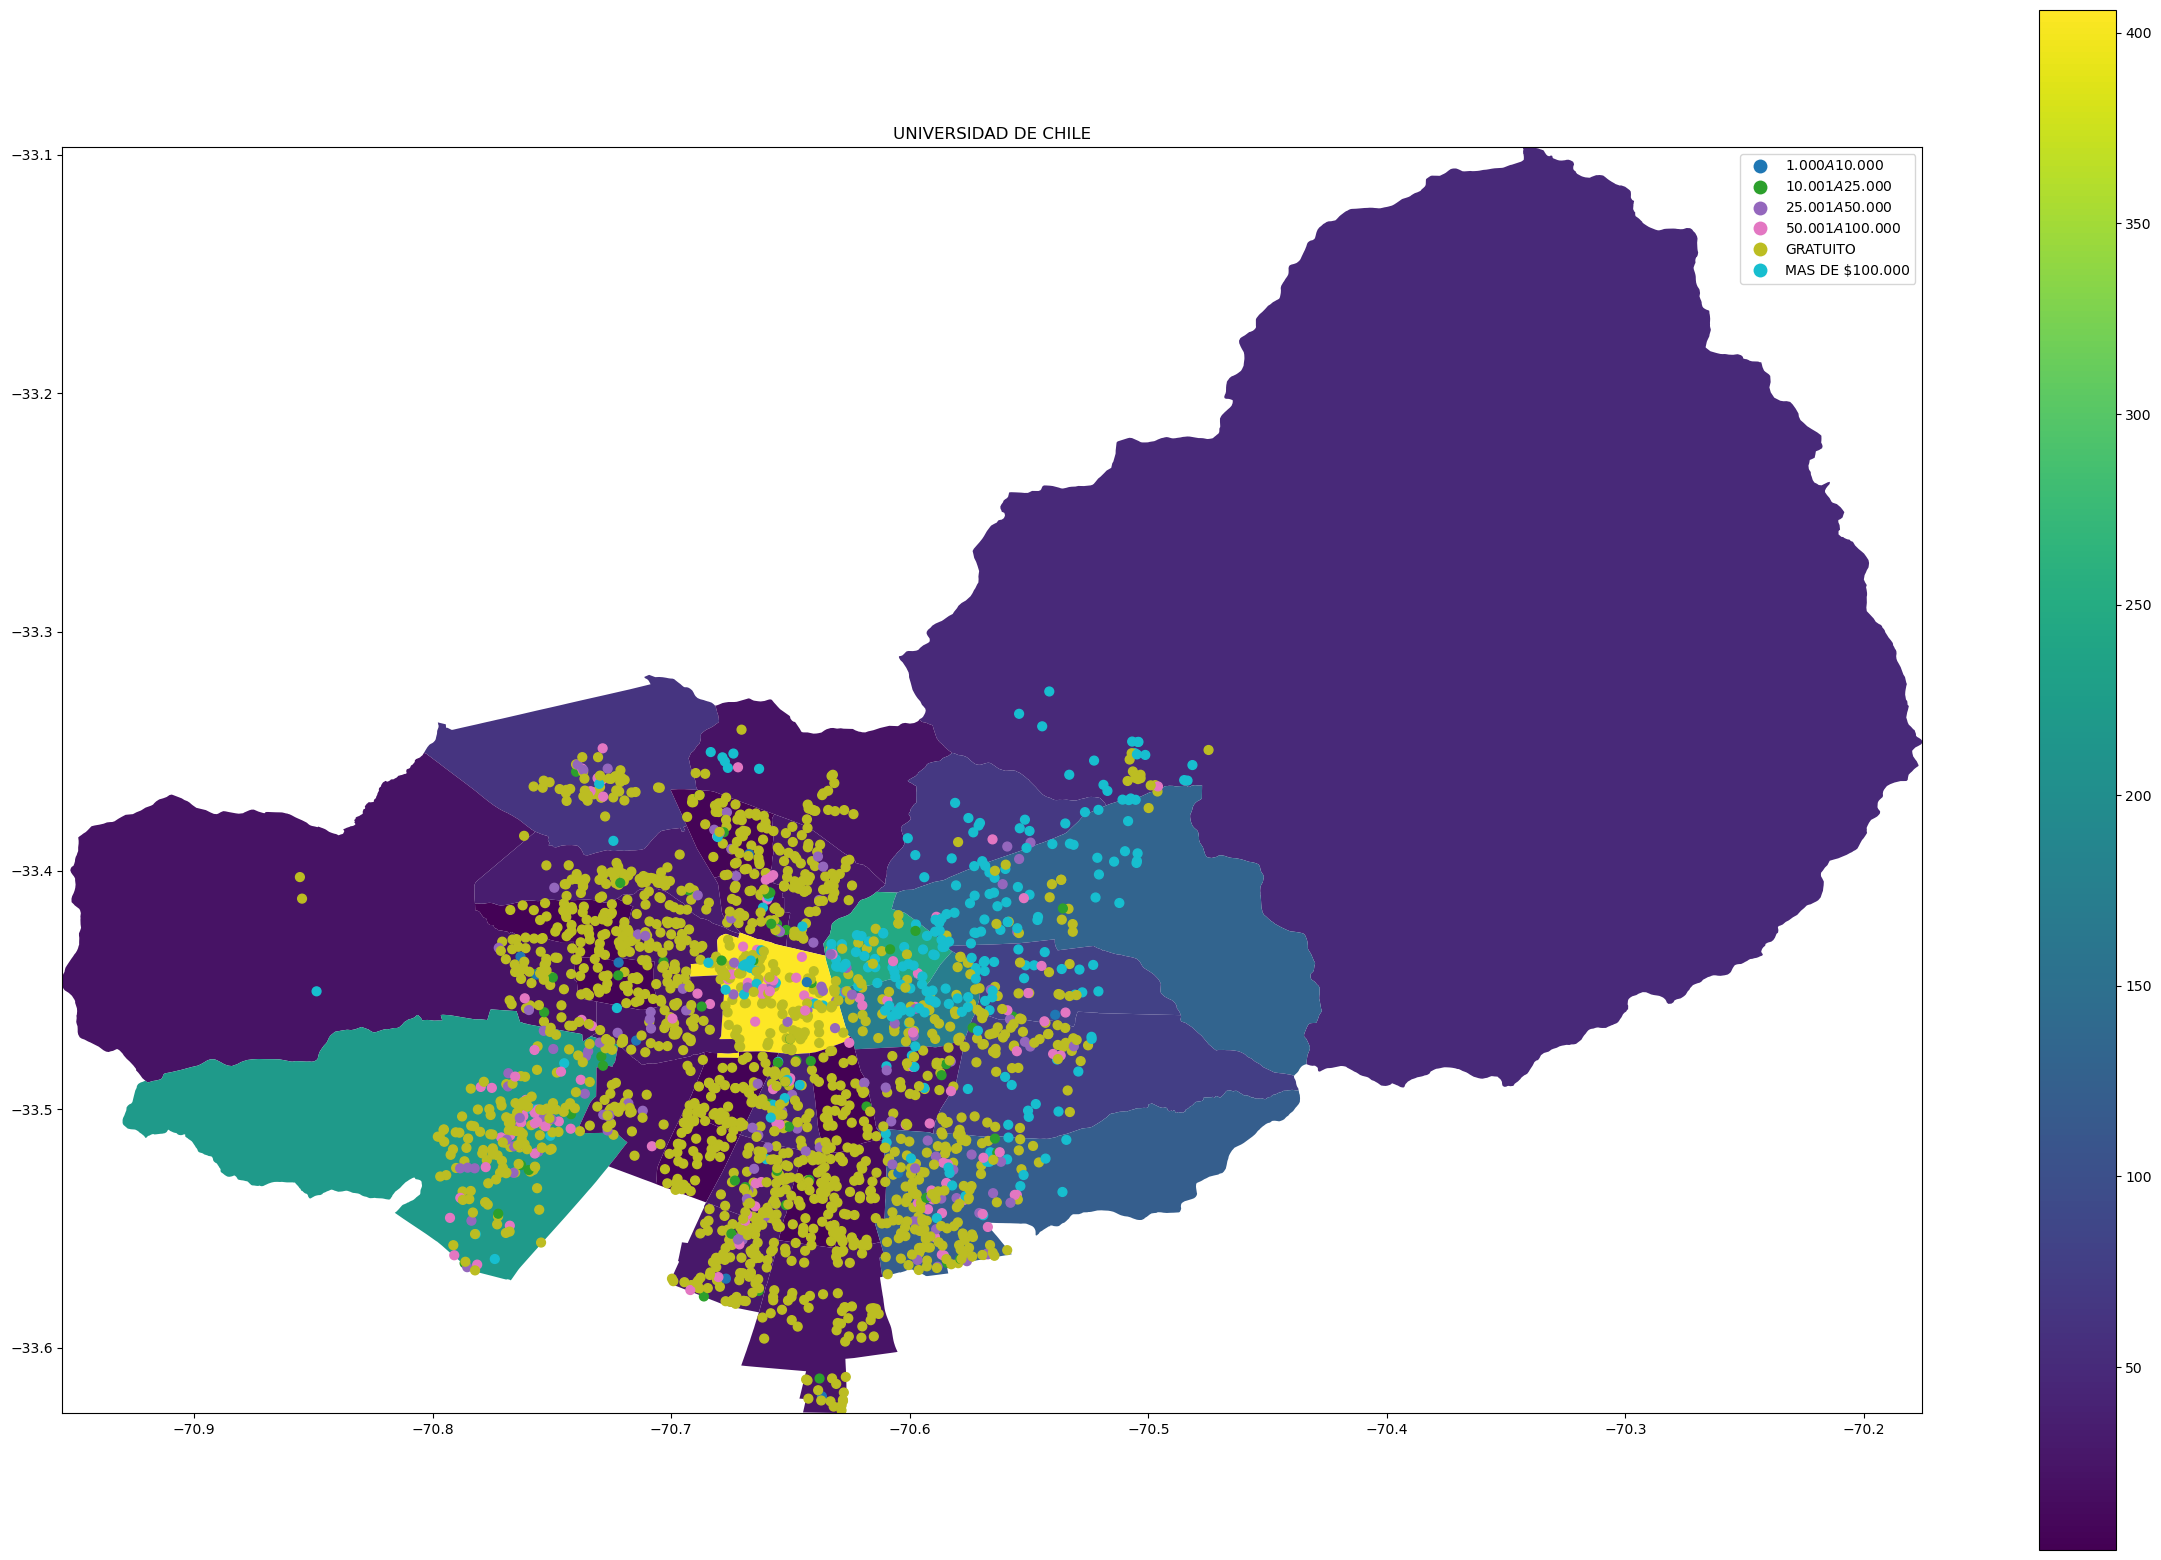

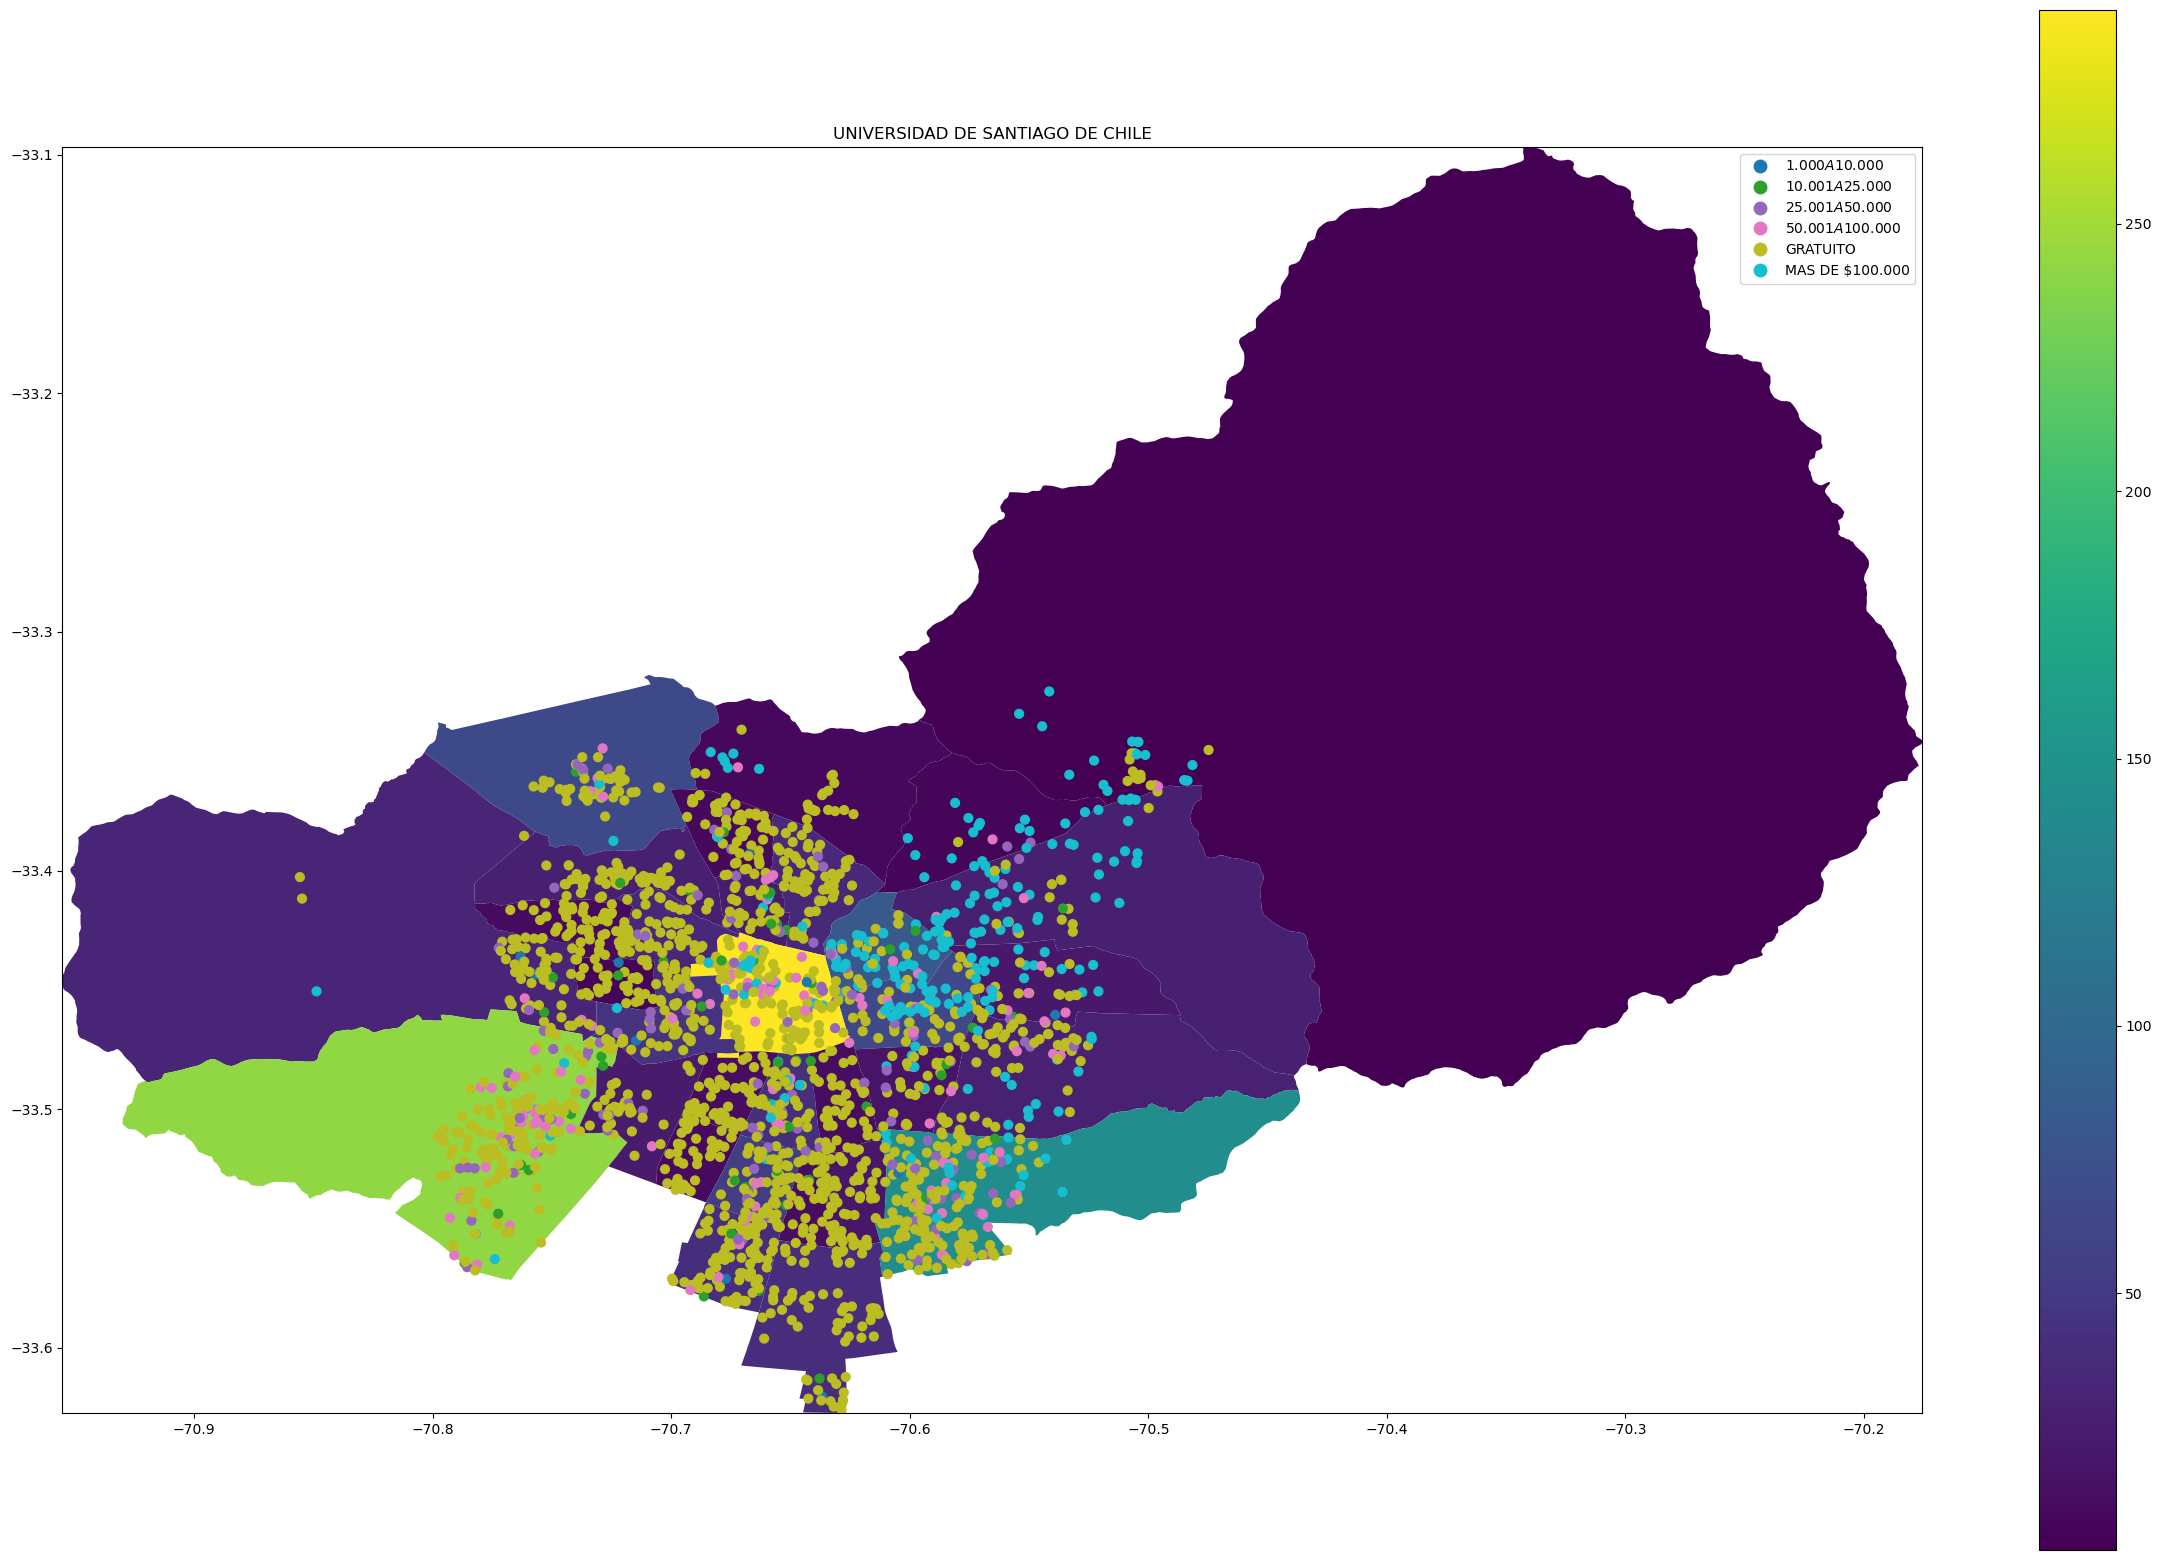

In [347]:
for universidad in lista_universidades_7:
    if universidad != 'UNIVERSIDAD DE CONCEPCION':
        fig, ax = plt.subplots(figsize = (30, 20))
        prov_stgo = comunas[comunas['PROVINCIA'] == 'Santiago']
        prov_stgo.plot(column = universidad, legend = True, ax = ax)
        ub_colegios_stgo = ub_colegios[ub_colegios['COD_PRO_RBD'] == 131]
        ub_colegios_stgo.plot(column = 'PAGO_MENSUAL', categorical = True, ax = ax, legend = True, s = 40)
        bounds = prov_stgo.geometry.total_bounds
        xlim = ([bounds[0],  bounds[2]])
        ylim = ([bounds[1],  bounds[3]])
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.title(universidad)
        


NOTAS: EN EL ÚLTIMO ANALISIS REALIZADO, EN VEZ DE PLOTEAR COLEGIOS DE ACUERDO AL VALOR, SE PUEDEN GENERAR CLUSTERS EN BASE A VALOR Y NEM, 